# Effect of Regularization on Logistic Regression Performance

In [3]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [4]:
df = pd.read_csv('heart.csv')

In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
df.isnull().sum().any()

False

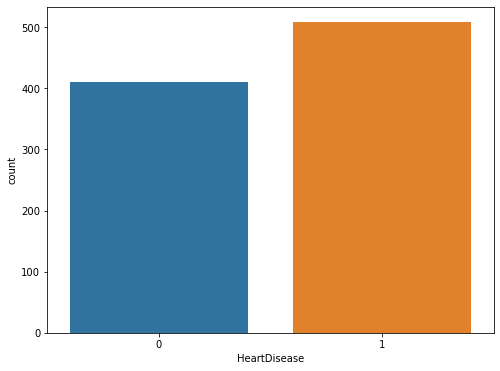

In [9]:
plt.figure(figsize=(8,6))
chart = sns.countplot(df['HeartDisease'])
plt.show()

In [10]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [11]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])

In [12]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [15]:
df.dtypes

Age                 int64
Sex                 int32
ChestPainType       int32
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int32
MaxHR               int64
ExerciseAngina      int32
Oldpeak           float64
ST_Slope            int32
HeartDisease        int64
dtype: object

In [16]:
x = df.drop(columns = 'HeartDisease', axis = 1)
y = df['HeartDisease']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## Implementation of Logistic Regression using L1 Regularization

In [19]:
scaler = StandardScaler(copy=True, with_mean=False, with_std=True)
x_trains = scaler.fit_transform(x_train)
x_tests = scaler.fit_transform(x_test)

In [20]:
c = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

for i in c:
    lr = LogisticRegression(C=i, penalty='l1', solver='liblinear', n_jobs=-1).fit(x_trains, y_train)
    y_pred = lr.predict(x_trains)
    acc = accuracy_score(y_train, y_pred)
    print('L1 Reg - train accuracy score for C =', i, 'is:',  (acc*100),'%')

L1 Reg - train accuracy score for C = 0.0001 is: 45.36784741144414 %
L1 Reg - train accuracy score for C = 0.001 is: 45.36784741144414 %
L1 Reg - train accuracy score for C = 0.01 is: 82.1525885558583 %
L1 Reg - train accuracy score for C = 0.1 is: 85.01362397820164 %
L1 Reg - train accuracy score for C = 1 is: 85.28610354223434 %
L1 Reg - train accuracy score for C = 10 is: 85.01362397820164 %
L1 Reg - train accuracy score for C = 100 is: 85.14986376021798 %


C = 1 is the optimal parameter value observed with 85.28% accuracy

In [21]:
lr = LogisticRegression(C=1, penalty='l1', solver='liblinear', n_jobs=-1).fit(x_trains, y_train)
y_pred = lr.predict(x_tests)
acc = accuracy_score(y_test, y_pred)
print('L1 Reg - test accuracy score for C = 1 is:',  (acc*100),'%')

L1 Reg - test accuracy score for C = 1 is: 89.13043478260869 %


In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        77
           1       0.91      0.90      0.91       107

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



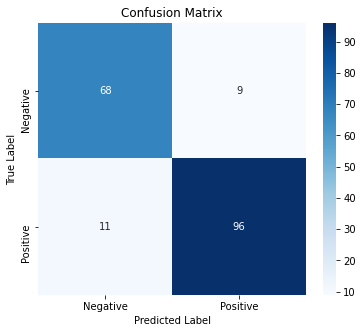

In [23]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix")
plt.show()

## Implementation of Logistic Regression using L2 Regularization

In [24]:
scaler = StandardScaler(copy=True, with_mean=False, with_std=True)
x_trains = scaler.fit_transform(x_train)
x_tests = scaler.fit_transform(x_test)

In [25]:
c = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

for i in c:
    lr = LogisticRegression(C=i, penalty='l2', solver='liblinear', n_jobs=-1).fit(x_trains, y_train)
    y_pred = lr.predict(x_trains)
    acc = accuracy_score(y_train, y_pred)
    print('L2 Reg - train accuracy score for C =', i, 'is:',  (acc*100),'%')

L2 Reg - train accuracy score for C = 0.0001 is: 55.449591280653955 %
L2 Reg - train accuracy score for C = 0.001 is: 82.69754768392372 %
L2 Reg - train accuracy score for C = 0.01 is: 84.33242506811989 %
L2 Reg - train accuracy score for C = 0.1 is: 84.87738419618529 %
L2 Reg - train accuracy score for C = 1 is: 85.01362397820164 %
L2 Reg - train accuracy score for C = 10 is: 84.87738419618529 %
L2 Reg - train accuracy score for C = 100 is: 85.14986376021798 %


C = 1 is the optimal parameter value observed with 85.01% accuracy

In [29]:
lr = LogisticRegression(C=1, penalty='l2', solver='liblinear', n_jobs=-1).fit(x_trains, y_train)
y_pred = lr.predict(x_tests)
acc = accuracy_score(y_test, y_pred)
print('L2 Reg - test accuracy score for C = 1 is:',  (acc*100),'%')

L2 Reg - test accuracy score for C = 1 is: 89.13043478260869 %


In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        77
           1       0.91      0.90      0.91       107

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



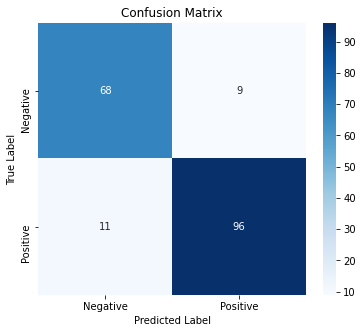

In [28]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix")
plt.show()